# matplotlib.pyplot
matplotlibはPythonにおけるデータ可視化のための代表的なライブラリです。

あらゆるグラフを描画することができ、きちんと使いこなせるようになれば、Excelなどを使うよりも自由度の高いグラフを書くことができます。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

plt.style.use('ggplot')

# 基本的な２つの書き方
matplotlibでグラフを描画するには、主に2つの方法が存在します。

１つ目は簡易的な方法で、少ないコードで済みますが、あまり自由度は高くありません。

2つ目は、もう少し厳格な方法で、いろいろなカスタマイズが可能ですが、その分きちんとコードを書かなくてはなりません。

以下に例を示します。

## 簡易的な方法

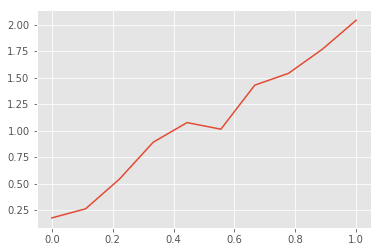

In [2]:
x = np.linspace(0, 1, 10)
y = 2 * x + 0.1 * np.random.randn(10)
plt.plot(x, y)
plt.show()

## 厳格な方法

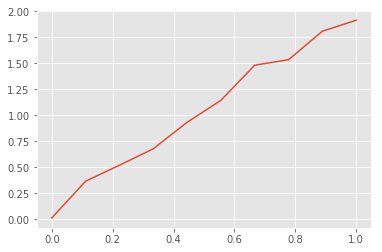

In [3]:
x = np.linspace(0, 1, 10)
y = 2 * x + 0.1 * np.random.randn(10)

fig = plt.figure()
ax = fig.add_subplot(111) 

ax.plot(x, y) 

plt.show()

このように、figure()とadd_subplot()メソッドを使って、fig, axを生成するのが違いです。

こちらの書き方だと、グラフを複数並べて書くことができたり、同じグラフ上に別のグラフを書くことができたりと自由度が高いです。

figとaxはそれぞれ、インターネットブラウザのウィンドウとタブのような関係です。つまり、figはグラフを配置する領域のことで、axはグラフを描画する領域を示します。

add_subplot(111)は、1行1列のグラフ（つまり１個のグラフ）のうち１番目に、グラフを描画する領域を追加しています。

# 複数のグラフを描画する

In [4]:
x_1 = np.linspace(0, 1, 10)
y_1 = x_1 + 0.1 * np.random.randn(10)

x_2 = np.linspace(0, 1, 100)
y_2 = 2 * x_2 + 0.1 * np.random.randn(100)

x_3 = np.linspace(0, 1, 1000)
y_3 = 3 * x_3 + 0.1 * np.random.randn(1000)

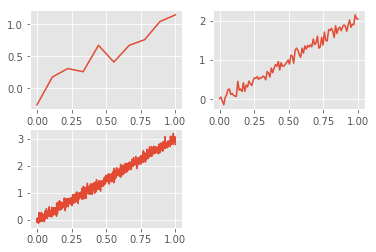

In [5]:
fig = plt.figure()

ax_1 = fig.add_subplot(221) 
ax_2 = fig.add_subplot(222) 
ax_3 = fig.add_subplot(223) 

ax_1.plot(x_1, y_1) 
ax_2.plot(x_2, y_2) 
ax_3.plot(x_3, y_3) 

plt.show()

# グラフの大きさを操作する
グラフの大きさを変えるには、fig生成時にfigsizeを指定します。

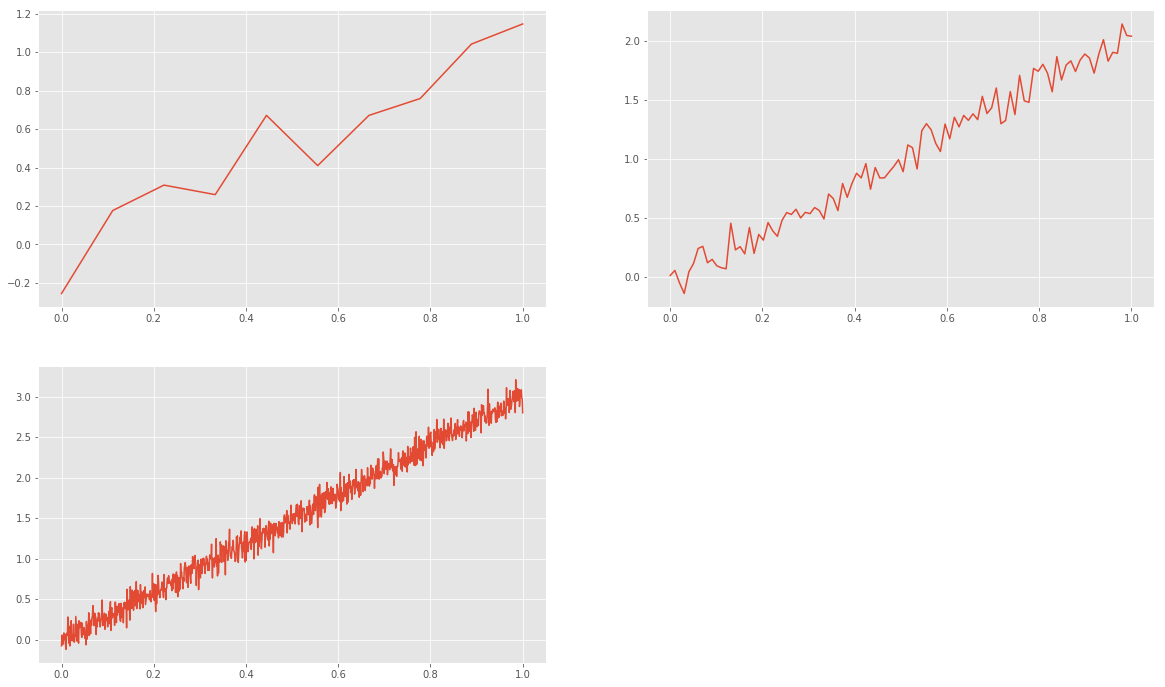

In [6]:
fig = plt.figure(figsize=(20, 12))

ax_1 = fig.add_subplot(221) 
ax_2 = fig.add_subplot(222) 
ax_3 = fig.add_subplot(223) 

ax_1.plot(x_1, y_1) 
ax_2.plot(x_2, y_2) 
ax_3.plot(x_3, y_3) 

plt.show()

## 簡易版での書き方

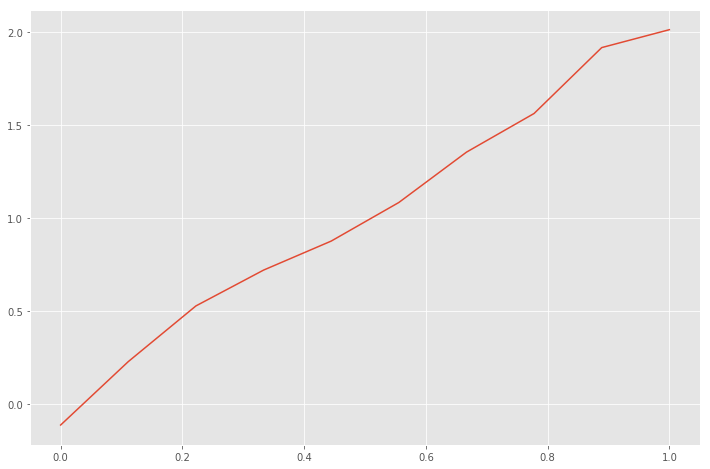

In [7]:
x = np.linspace(0, 1, 10)
y = 2 * x + 0.1 * np.random.randn(10)

plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

## figureとaxの生成を同時に行う
上の例では、まずfigを生成し、そこにaxを追加する、という方法を取りました。

figとaxを同時に生成するには、subplots()メソッドを使います。

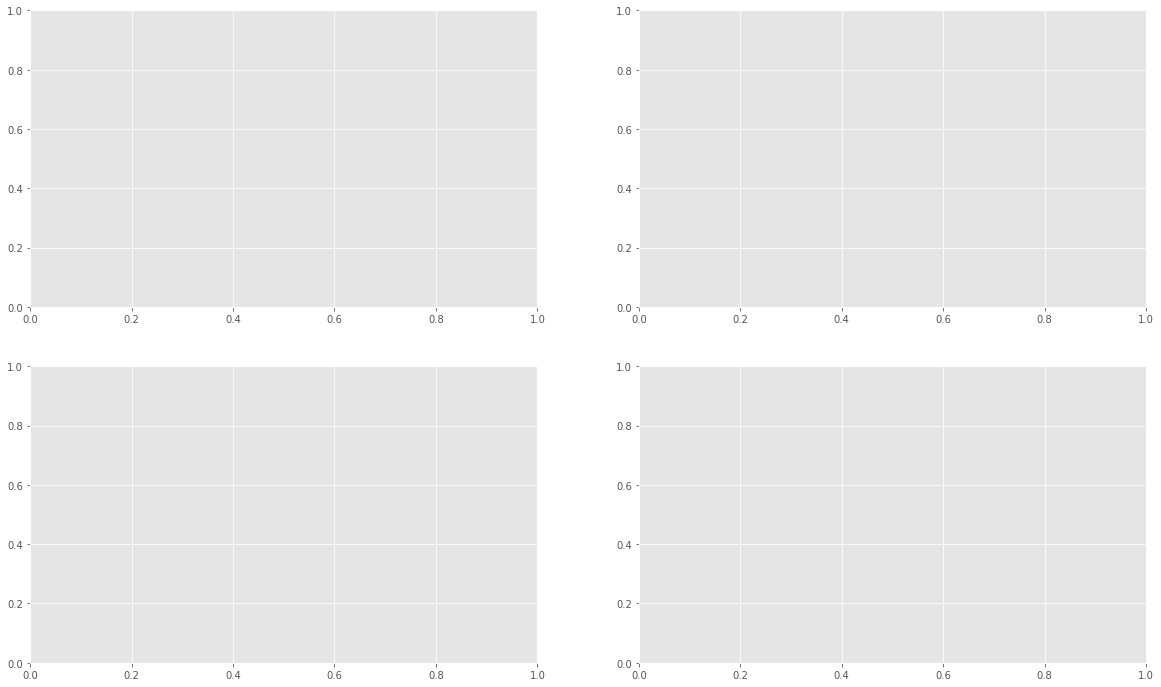

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

In [9]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1137e1208>,
      dtype=object)

In [10]:
axes.shape

(2, 2)

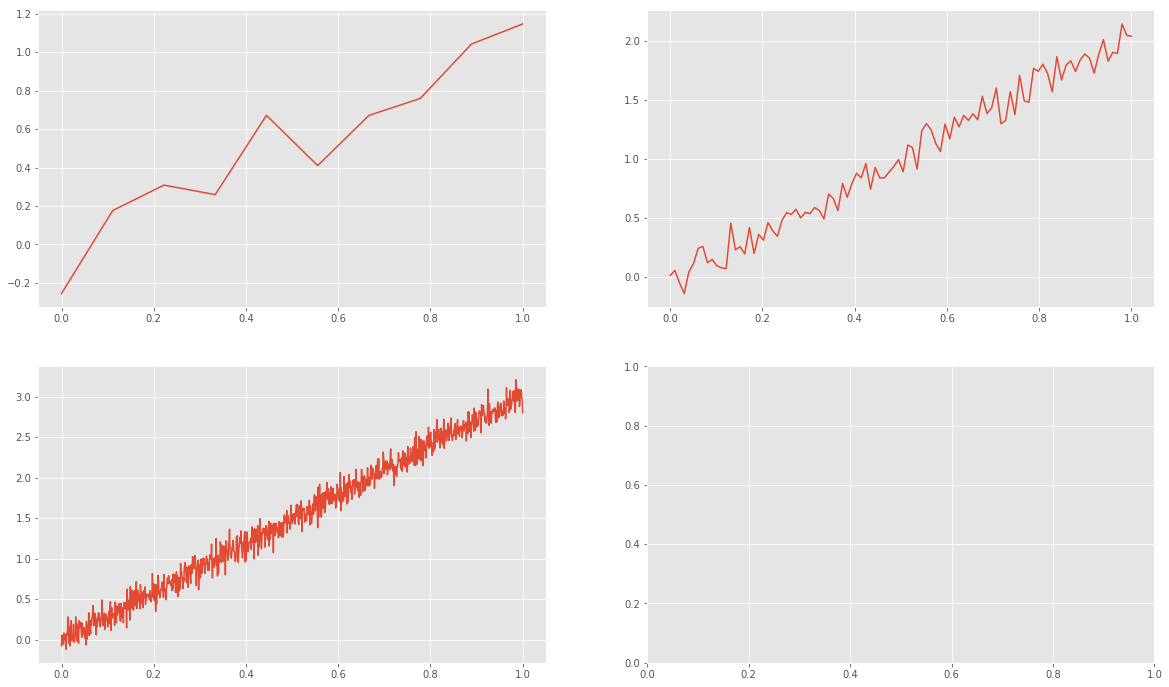

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

axes[0][0].plot(x_1, y_1) 
axes[0][1].plot(x_2, y_2) 
axes[1][0].plot(x_3, y_3) 

plt.show()

## axesを１次元配列に変換
for文などでループする際などは、行の番号と列の番号どちらも指定しなくてはならない２次元配列は不便です。

ravel()メソッドでaxesを１次元配列に変換すれば、通し番号だけでグラフを指定することができます。

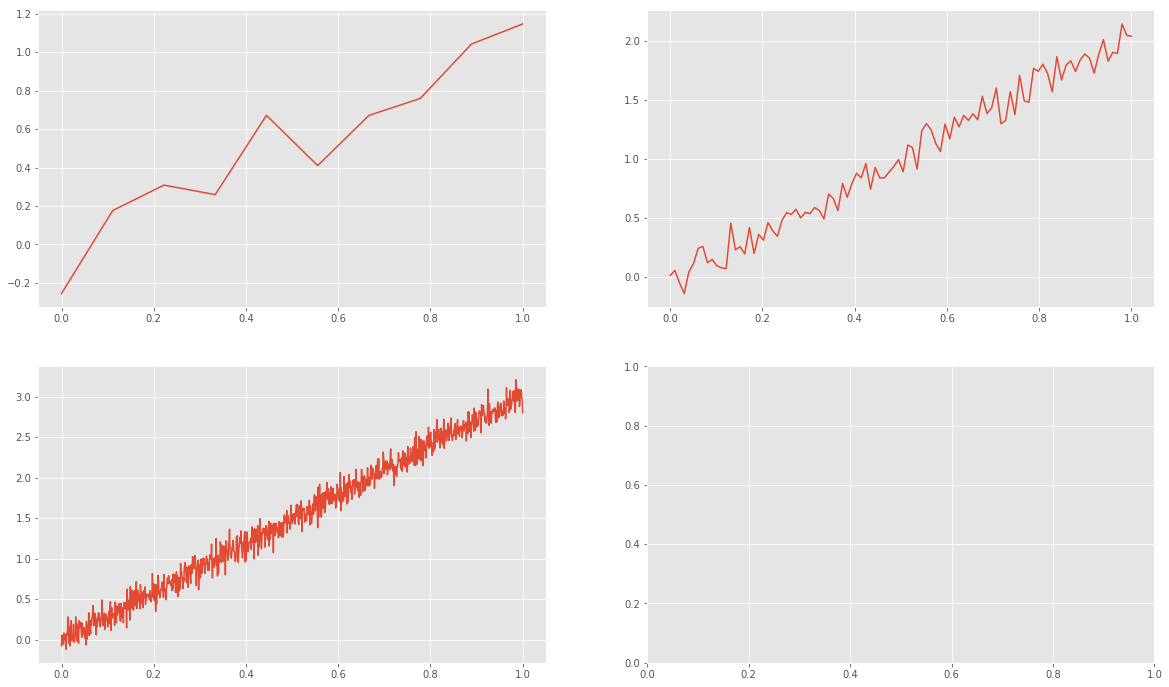

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

axes.ravel()[0].plot(x_1, y_1) 
axes.ravel()[1].plot(x_2, y_2) 
axes.ravel()[2].plot(x_3, y_3) 

plt.show()

# 折れ線グラフ
折れ線グラフを描画するには、plotメソッドを使います。

パラメーターはたくさんありますが、大切なのは、第１引数のxの値と、第２引数のｙの値です。

In [13]:
df = pd.DataFrame(data=np.random.rand(30, 2), columns=['C1', 'C2'])
df.head()

,C1,C2
0,0.374414,0.353819
1,0.378268,0.657862
2,0.359453,0.900367
3,0.983275,0.030427
4,0.193623,0.112250


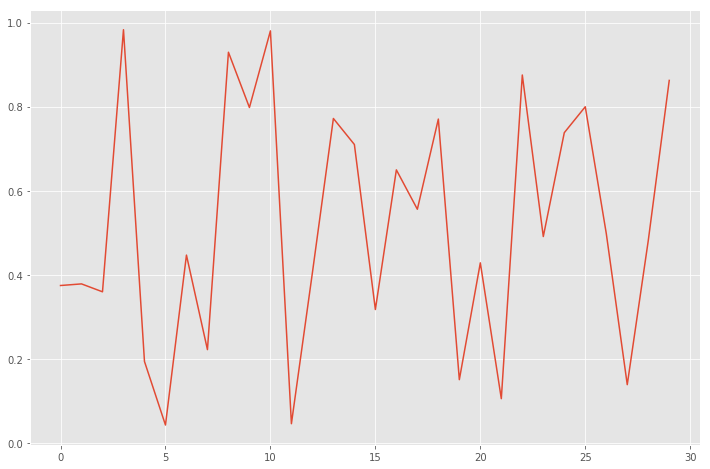

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(df['C1'])
plt.show()

## 複数の線を描画する

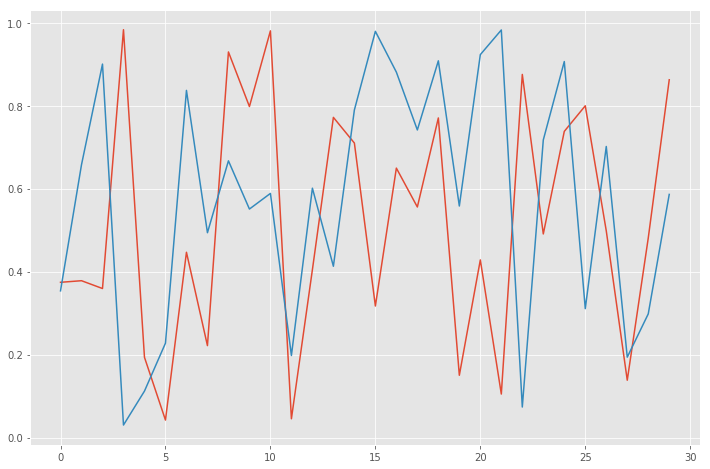

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(df['C1'])
plt.plot(df['C2'])
plt.show()

## 見た目を整える
### タイトル・軸・凡例の設定

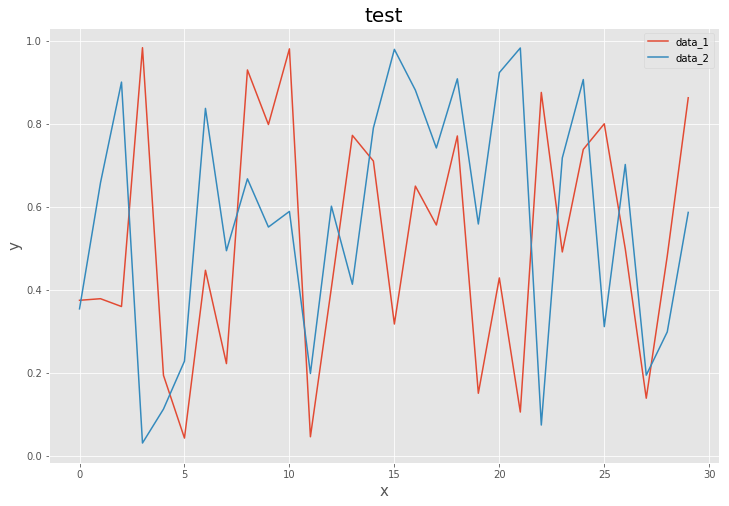

In [16]:
plt.figure(figsize=(12, 8))

plt.plot(df['C1'])
plt.plot(df['C2'])

plt.title("test", fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

plt.legend(['data_1', 'data_2'])

plt.show()

## 線の色・太さ・スタイルを変更

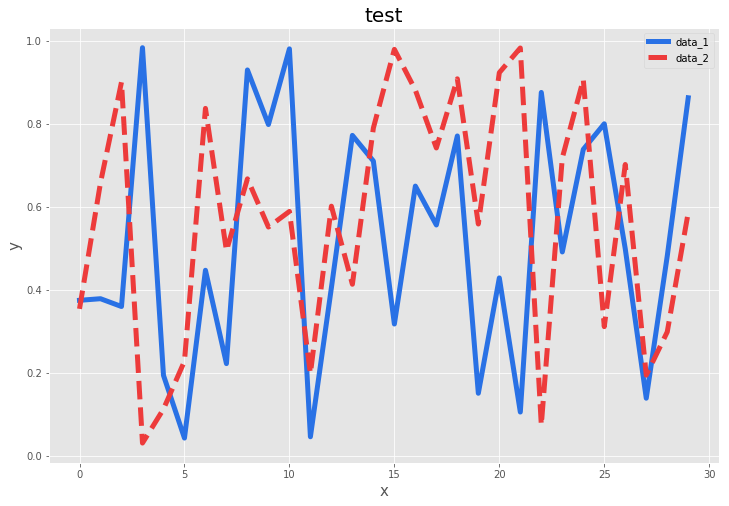

In [17]:
plt.figure(figsize=(12, 8))

plt.plot(df['C1'], color='#2971e5', linewidth=5.0, linestyle='solid')
plt.plot(df['C2'], color='#ed3b3b', linewidth=5.0, linestyle='dashed')

plt.title("test", fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

plt.legend(['data_1', 'data_2'])

plt.show()

# 散布図
散布図の描画には、scatterメソッドを使います。

In [18]:
df = pd.DataFrame(data=np.random.randn(500, 2), columns=['C1', 'C2'])
df.head()

,C1,C2
0,0.960048,-0.416499
1,-0.276823,1.123905
2,-0.173464,-0.510030
3,1.392518,1.037586
4,0.018792,-0.593777


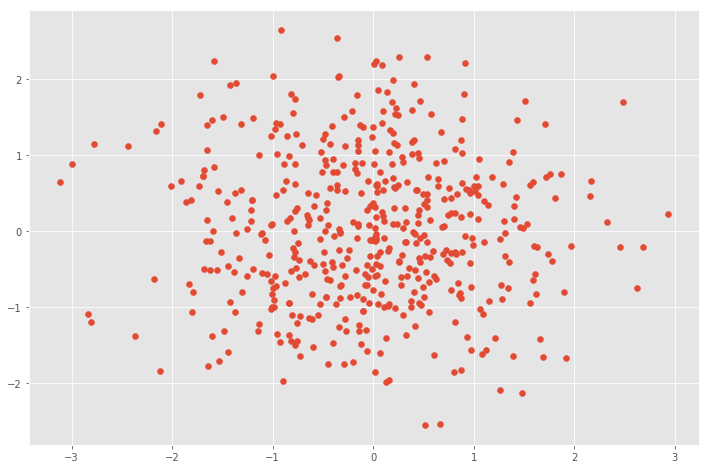

In [19]:
plt.figure(figsize=(12, 8))
plt.scatter(df['C1'], df['C2'])
plt.show()

## 点の大きさ・色・スタイルを変更する

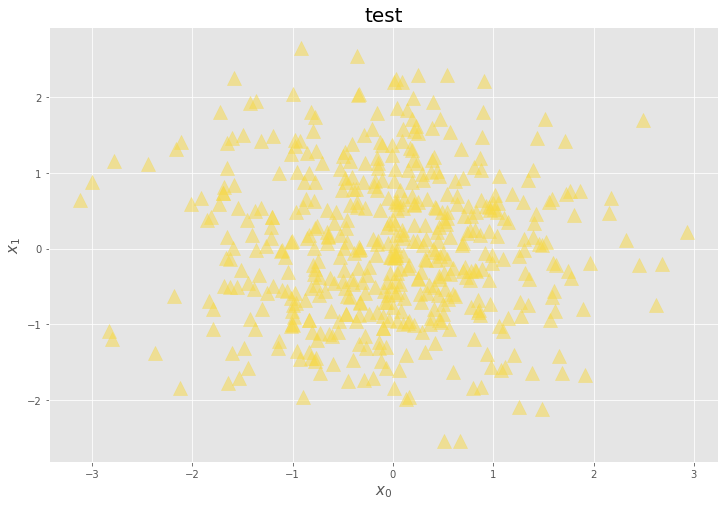

In [20]:
plt.figure(figsize=(12, 8))

plt.scatter(df['C1'], df['C2'], s=200, c='#f7d945', marker='^', alpha=0.5)

plt.title("test", fontsize=20)
plt.xlabel('$x_0$', fontsize=15)
plt.ylabel('$x_1$', fontsize=15)

plt.show()

## 点の大きさや色をデータによって変える

In [21]:
df['data_size'] = np.random.randint(1, 100, 500)
df.head()

,C1,C2,data_size
0,0.960048,-0.416499,92
1,-0.276823,1.123905,77
2,-0.173464,-0.510030,40
3,1.392518,1.037586,86
4,0.018792,-0.593777,26


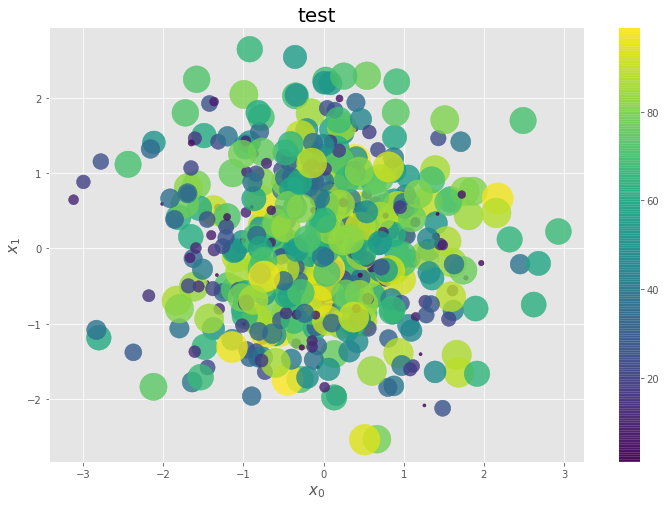

In [22]:
plt.figure(figsize=(12, 8))

plt.scatter(df['C1'], df['C2'], s=df['data_size']*10, c=df['data_size'], cmap='viridis', alpha=0.8)
plt.colorbar()

plt.title("test", fontsize=20)
plt.xlabel('$x_0$', fontsize=15)
plt.ylabel('$x_1$', fontsize=15)

plt.show()

# 棒グラフ
棒グラフを描画するには、bar()メソッドを使います。

In [23]:
df = pd.DataFrame({'C1': ['A', 'A', 'A', 'B', 'B', 'C'],
                   'C2': [20, 50, 60, 80, 100, 30],
                   'C3': [40, 200, 100, 500, 40, 200,]})
df

,C1,C2,C3
0,A,20,40
1,A,50,200
2,A,60,100
3,B,80,500
4,B,100,40
5,C,30,200


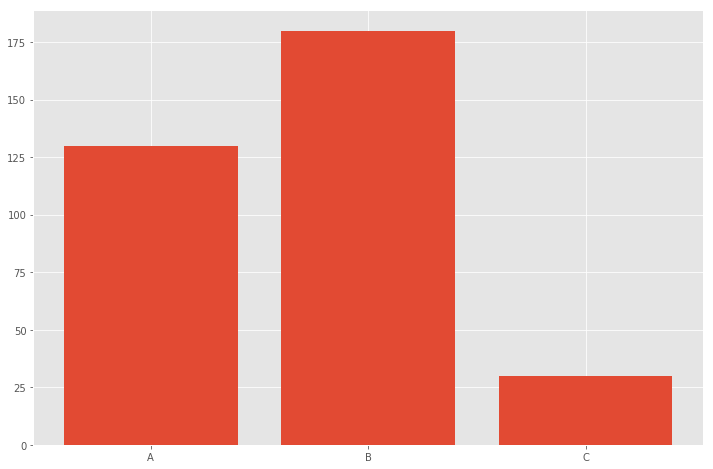

In [24]:
plt.figure(figsize=(12, 8))
plt.bar(df['C1'].value_counts().index, df.groupby('C1').sum()['C2'])
plt.show()

## 複数の棒グラフを描画

In [25]:
df = pd.DataFrame(data=100 * np.random.rand(5, 5), index=['A', 'B', 'C', 'D', 'E'], 
                  columns=['C1', 'C2', 'C3', 'C4', 'C5'])
df.head()

,C1,C2,C3,C4,C5
A,79.973013,16.217087,19.457452,88.203592,93.896490
B,31.847124,84.216810,85.885691,60.539048,56.608845
C,57.583841,30.128919,61.886704,24.358027,17.763229
D,41.295045,70.578042,62.142769,96.488208,64.645591
E,14.131405,16.121821,9.306714,19.117376,59.795090


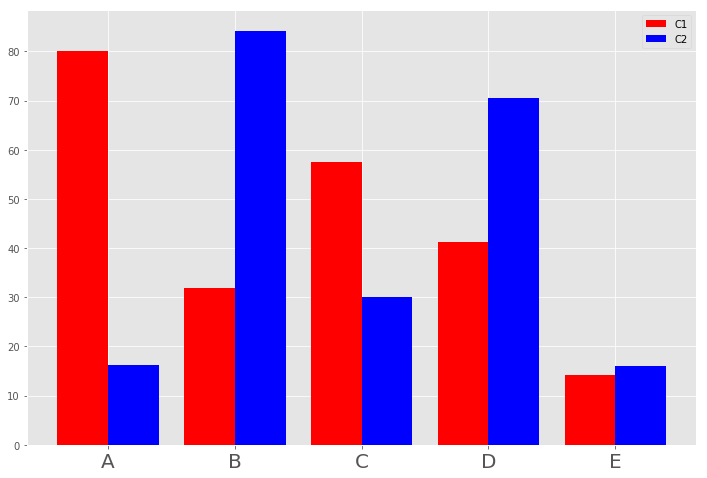

In [26]:
plt.figure(figsize=(12, 8))

ｘ = np.arange(len(df))

bar_width = 0.4

plt.bar(x, df['C1'], color='red', width=bar_width, label='C1')
plt.bar(x + bar_width, df['C2'], color='blue', width=bar_width, label='C2')

plt.xticks(x + bar_width / 2, df.index, fontsize=20)
plt.legend()

plt.show()

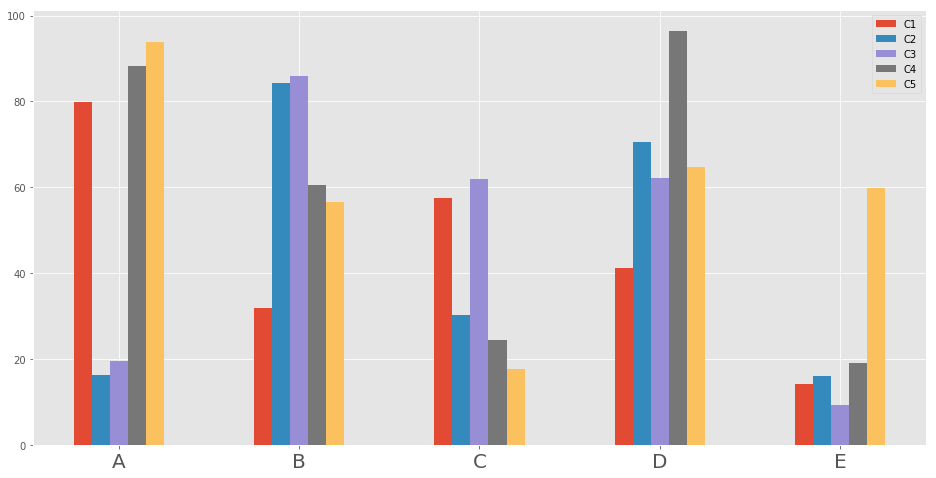

In [27]:
plt.figure(figsize=(16, 8))

ｘ = np.arange(len(df), dtype='float64')

bar_width = 0.1

for col in df.columns:
    plt.bar(x, df[col], width=bar_width, label=col)
    x += bar_width
    
plt.xticks((np.arange(len(df)) + x - bar_width) / 2, df.index, fontsize=20)
plt.legend()
plt.show()

# ヒストグラム
ヒスグラムの描画には、histメソッドを使います。

In [28]:
df = pd.DataFrame(data=np.random.randn(500), columns=['C1'])
df.head()

,C1
0,1.222877
1,-2.086510
2,-0.590757
3,0.971970
4,-1.193258


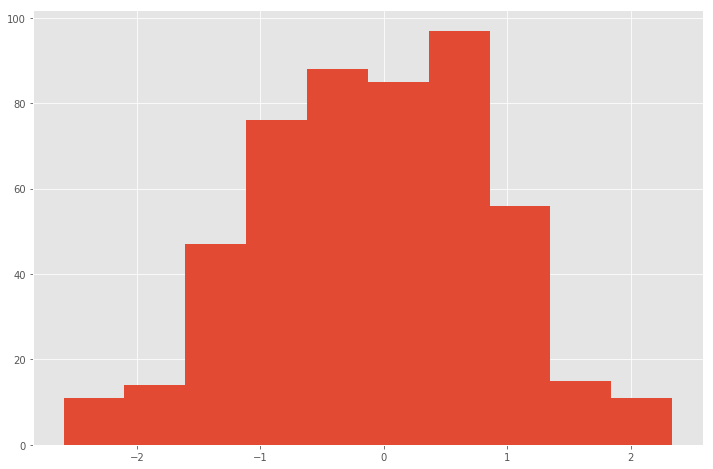

In [29]:
plt.figure(figsize=(12, 8))
plt.hist(df['C1'])
plt.show()

## 見た目を整える
ビンの数を指定するbins、棒の幅を指定しているrwidthなどを調節するとより見やすいヒストグラムになります。

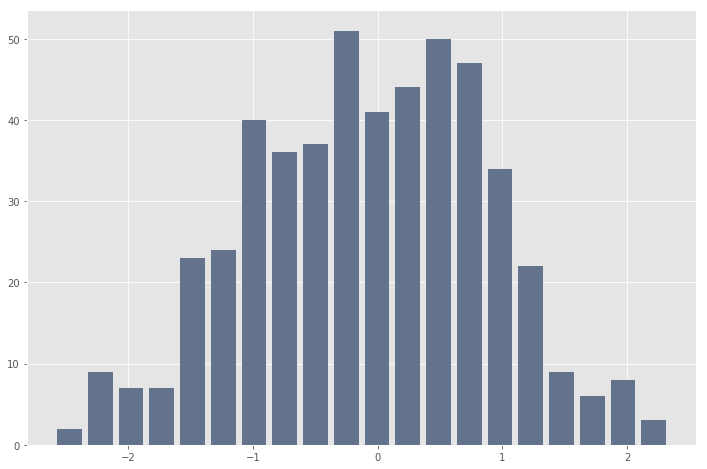

In [30]:
plt.figure(figsize=(12, 8))
plt.hist(df['C1'], bins=20, rwidth=0.8, color='#63738c')
plt.show()

## 正規分布曲線を描く

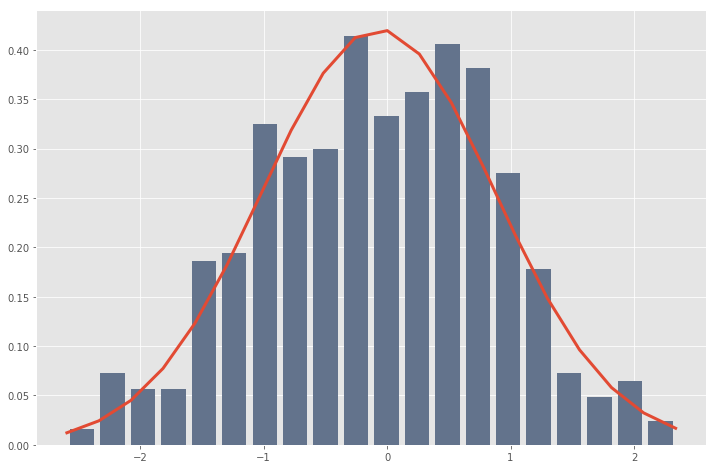

In [31]:
from scipy.stats import norm

def histogram(x, bins=20):
    plt.figure(figsize=(12, 8))
    plt.hist(x, bins=bins, rwidth=0.8, color='#63738c', density=True)
    
    mean = x.mean()
    std = x.std()
    
    X = np.linspace(x.min(), x.max(), bins)
    y = norm.pdf(X, mean, std)
    
    plt.plot(X, y, linewidth=3)
    plt.show()
    
histogram(df['C1'])

# 円グラフ
円グラフの描画には、pieメソッドを使います。

In [32]:
df = pd.DataFrame(data=np.random.randint(0, 5, 500), columns=['C1'])
df.head()

,C1
0,1
1,2
2,0
3,3
4,4


In [33]:
df['C1'].value_counts()

1    125
4    106
0    101
3     95
2     73
Name: C1, dtype: int64

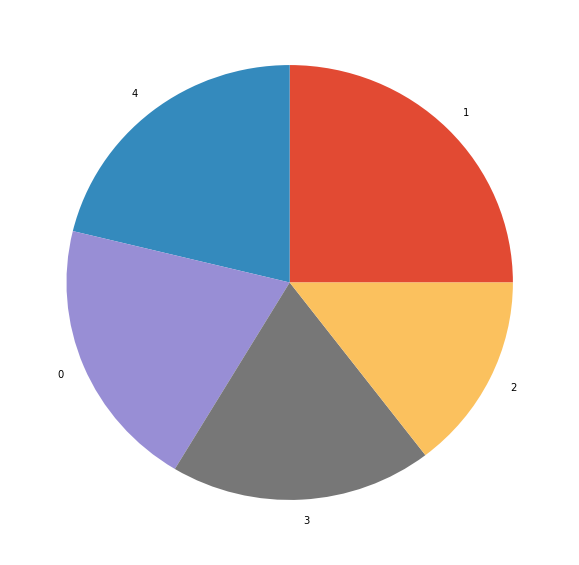

In [34]:
plt.figure(figsize=(10, 10))
plt.pie(df['C1'].value_counts(), labels=df['C1'].value_counts().index)
plt.show()

## 見た目を整える
デフォルトの設定のままだと、開始位置が３時、表示順が半時計回りになっています。これらを改善していきましょう。

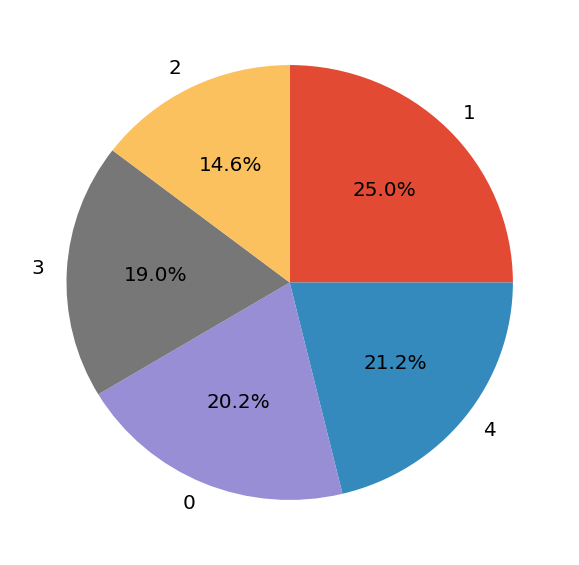

In [35]:
plt.figure(figsize=(10, 10))

textprops = {'fontsize': 20}

plt.pie(df['C1'].value_counts(), 
        labels=df['C1'].value_counts().index,
        autopct='%.1f%%',
        startangle=90, 
        counterclock=False,
        textprops=textprops)

plt.show()

# 箱ひげ図
箱ひげ図を描画するには、boxplotメソッドを使います。ここでは、ごく基本的な例のみを示します。

In [36]:
df = pd.DataFrame(data=np.random.randint(0, 100, 500), columns=['C1'])
df.head()

,C1
0,39
1,38
2,43
3,48
4,0


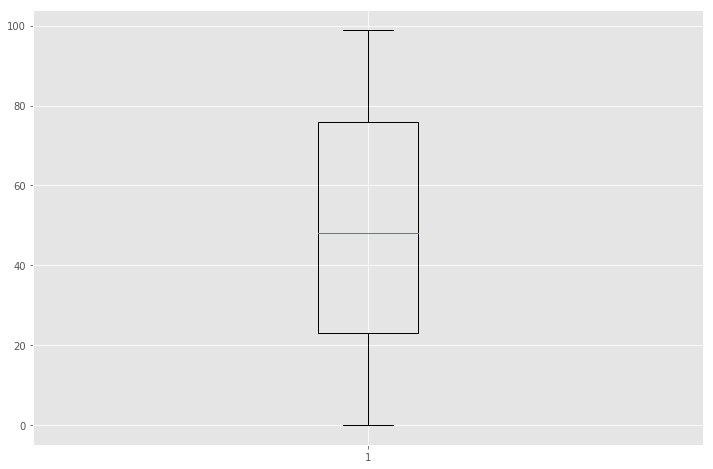

In [37]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['C1'])
plt.show()

## 複数の箱ひげ図を描画

In [38]:
df = pd.DataFrame(data=np.random.rand(500, 5), columns=['C1', 'C2', 'C3', 'C4', 'C5'])
df.head()

,C1,C2,C3,C4,C5
0,0.406445,0.170097,0.921980,0.783991,0.420354
1,0.599915,0.226197,0.413130,0.400940,0.754040
2,0.431723,0.754871,0.790079,0.385620,0.440063
3,0.520716,0.003511,0.195055,0.847137,0.760940
4,0.077152,0.634898,0.020735,0.534204,0.161482


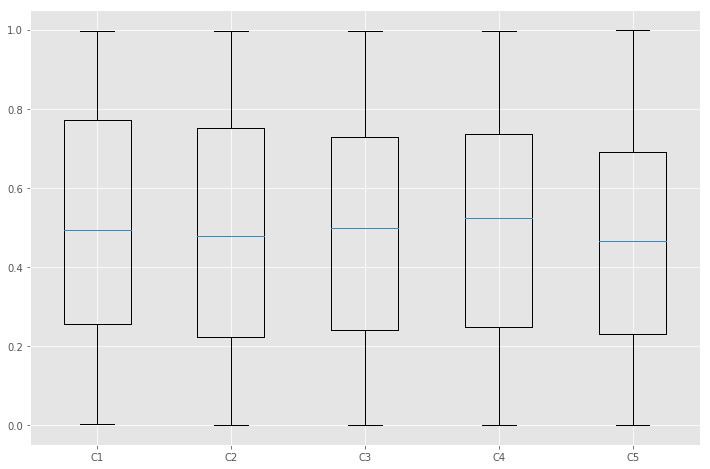

In [39]:
plt.figure(figsize=(12, 8))
plt.boxplot([df['C1'], df['C2'], df['C3'], df['C4'], df['C5']], labels=df.columns)
plt.show()

# ヒートマップ
ヒートマップを描画するには、pcolorメソッドを使います。

In [40]:
df = pd.DataFrame(data=np.random.rand(5, 5), columns=['C1', 'C2', 'C3', 'C4', 'C5'])
df.head()

,C1,C2,C3,C4,C5
0,0.240787,0.519896,0.736032,0.476668,0.272310
1,0.822093,0.829115,0.550648,0.601560,0.513534
2,0.782137,0.887078,0.002012,0.973627,0.344121
3,0.399127,0.367683,0.844363,0.736793,0.178911
4,0.408094,0.002727,0.803113,0.236280,0.083017


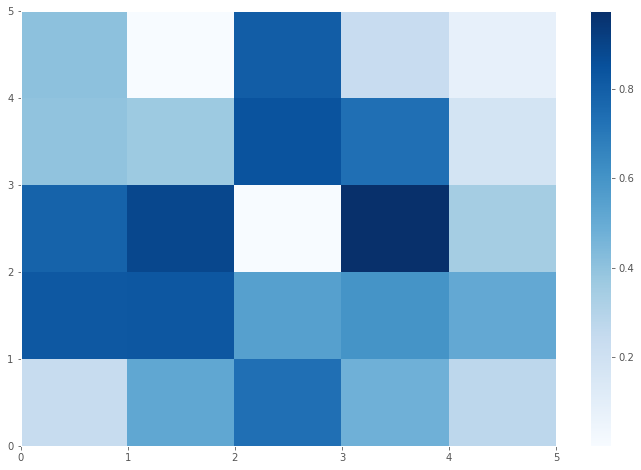

In [41]:
plt.figure(figsize=(12, 8))
plt.pcolor(df, cmap='Blues')
plt.colorbar()
plt.show()

# スタイル
スタイルを設定することで、きれいでかっこいいグラフが簡単に描画できます。

スタイルの設定はmatplotlibでも行えますが、seabornというライブラリを使うとより綺麗なスタイルの設定ができます。

ここでは、簡単なスタイルの設定のみを紹介します。

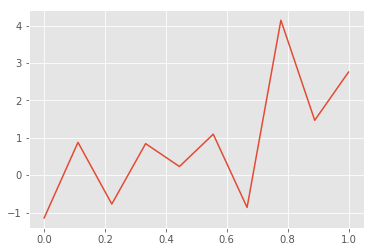

In [42]:
plt.style.use('ggplot')

x = np.linspace(0, 1, 10)
y = 2 * x + np.random.randn(10)

fig = plt.figure()
ax = fig.add_subplot(111) 

ax.plot(x, y) 

plt.show()

In [43]:
import seaborn as sns
sns.set_style('darkgrid')

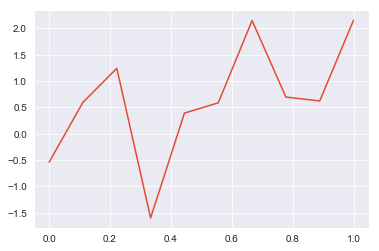

In [44]:
x = np.linspace(0, 1, 10)
y = 2 * x + np.random.randn(10)

fig = plt.figure()
ax = fig.add_subplot(111) 

ax.plot(x, y) 

plt.show()

# 画像ファイルとして出力
グラフを画像ファイルとして出力するには、savefigメソッドを使います。

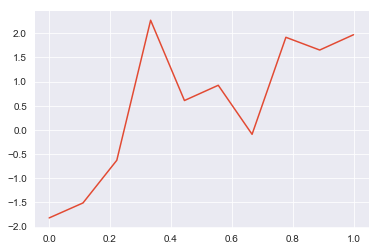

In [45]:
x = np.linspace(0, 1, 10)
y = 2 * x + np.random.randn(10)

fig = plt.figure()
ax = fig.add_subplot(111) 

ax.plot(x, y) 

plt.savefig('test.png')